In [1]:
from src.houses import *
from src.agents import *
from src.bidding import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # to remove 1e6 base from the x axis on plots

c:\Daniel's Things\Coding projects\eco_projects\schelling_income_model\src\houses.py:45: SyntaxWarning: invalid escape sequence '\l'
  """We define the agent's max WTP for rent in neighborhood $j$ as


In [2]:
n = 1_000_000
agents = generate_agents(n)
size = sys.getsizeof(agents)
print(f"The agents array takes up {size} bytes of memory, which is {size/(1024**3):.6f} GB of memory")
print(agents)

The agents array takes up 31000112 bytes of memory, which is 0.028871 GB of memory
[(     0,  32982.02210538, 0, 29, False, -1, 0., 0.609665  )
 (     1, 836178.52214489, 8, 37, False, -1, 0., 0.6185966 )
 (     2, 104446.85630975, 2, 35, False, -1, 0., 0.6235912 ) ...
 (999997, 782428.24825184, 8, 26, False, -1, 0., 0.7244324 )
 (999998, 117968.16291936, 2, 61, False, -1, 0., 0.77612495)
 (999999, 897631.96707366, 8, 81, False, -1, 0., 0.6695496 )]


In [3]:
freq, total = get_freq_and_total(agents)
proportions = get_proportion(freq, total)
agents = check_happiness(agents, proportions)
print(agents)

[(     0,  32982.02210538, 0, 29,  True, -1, 0., 0.609665  )
 (     1, 836178.52214489, 8, 37, False, -1, 0., 0.6185966 )
 (     2, 104446.85630975, 2, 35,  True, -1, 0., 0.6235912 ) ...
 (999997, 782428.24825184, 8, 26, False, -1, 0., 0.7244324 )
 (999998, 117968.16291936, 2, 61,  True, -1, 0., 0.77612495)
 (999999, 897631.96707366, 8, 81, False, -1, 0., 0.6695496 )]


In [4]:
utility = get_utilities(agents, proportions)
print(utility)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.47271886 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.8110319  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.7599887  ... 0.         0.         0.        ]]


In [5]:
bids, neighborhoods_chosen = place_bid(agents, utility)
print(bids)

[     0.         250853.75664347      0.         ... 234728.67447555
      0.         269289.7901221 ]


In [6]:
houses = initialize_houses(agents)
print(houses)

[(     0, -1, 60, 100000.) (     1, -1, 77, 100000.)
 (     2, -1, 67, 100000.) ... (999997, -1,  8, 100000.)
 (999998, -1, 52, 100000.) (999999, -1, 81, 100000.)]


In [7]:
agent_house_mapping(agents, houses)
priced_out_mask = check_priced_out(agents, houses, proportions)
evict_priced_out(agents, houses, priced_out_mask)

In [8]:
agents, houses, cutoff_bids = allocate_houses(agents, houses, bids, neighborhoods_chosen)
print(f"Iteration 0: {round(np.mean(agents["happy"])*100,4)}% of agents are happy")
print(f"{round(np.sum(agents["neighborhood"]==-1)/n,4)}% of agents are homeless")
# happiness check -> bids -> price update -> assignment -> happiness check
max_iter = 100
count = 1
while not np.all(agents["happy"]):
    freq, total = get_freq_and_total(agents)
    proportions = get_proportion(freq, total)

    priced_out_mask = check_priced_out(agents, houses, proportions)
    evict_priced_out(agents, houses, priced_out_mask)

    utilities = get_utilities(agents, proportions)
    bids, neighborhoods_chosen = place_bid(agents, utilities)
    agents, houses, cutoff_bids = allocate_houses(agents, houses, bids, neighborhoods_chosen)
    houses = update_prices(houses, bids, neighborhoods_chosen, cutoff_bids)
    
    freq, total = get_freq_and_total(agents)
    proportions = get_proportion(freq, total)
    agents = check_happiness(agents, proportions)
    print(f"Iteration {count}: {round(np.mean(agents["happy"])*100,4)}% of agents are happy")
    print(f"{round(np.sum(agents["neighborhood"]==-1)*100/n,4)}% of agents are homeless")
    print()
    count += 1
    if count >= max_iter:
        break

# runtime:
# 1 mil agents, not plugged in: 3m 20.9s
# 1 mil agents, plugged in: 2m 40.6s
# 30 mil agents (approx delhi popln): failed to run - out of memory

Iteration 0: 55.2814% of agents are happy
0.0% of agents are homeless
Iteration 1: 56.039% of agents are happy
0.2371% of agents are homeless

Iteration 2: 52.098% of agents are happy
4.2883% of agents are homeless

Iteration 3: 53.778% of agents are happy
4.5911% of agents are homeless

Iteration 4: 52.9197% of agents are happy
5.2358% of agents are homeless

Iteration 5: 52.5707% of agents are happy
5.2717% of agents are homeless

Iteration 6: 52.6175% of agents are happy
5.915% of agents are homeless

Iteration 7: 52.5161% of agents are happy
6.1499% of agents are homeless

Iteration 8: 53.9226% of agents are happy
5.7547% of agents are homeless

Iteration 9: 53.6379% of agents are happy
5.7648% of agents are homeless

Iteration 10: 52.8936% of agents are happy
5.771% of agents are homeless

Iteration 11: 52.8934% of agents are happy
5.9542% of agents are homeless

Iteration 12: 52.8912% of agents are happy
5.9648% of agents are homeless

Iteration 13: 52.8915% of agents are happy
6

In [11]:
for i in range(-1, np.max(agents["neighborhood"]+1)):
    print(f"Neighborhood {i}: {np.sum(agents["neighborhood"]==i)} agents")

Neighborhood -1: 105840 agents
Neighborhood 0: 8851 agents
Neighborhood 1: 8788 agents
Neighborhood 2: 9007 agents
Neighborhood 3: 8867 agents
Neighborhood 4: 8905 agents
Neighborhood 5: 8865 agents
Neighborhood 6: 17579 agents
Neighborhood 7: 8893 agents
Neighborhood 8: 8645 agents
Neighborhood 9: 8668 agents
Neighborhood 10: 16829 agents
Neighborhood 11: 8900 agents
Neighborhood 12: 8778 agents
Neighborhood 13: 8860 agents
Neighborhood 14: 8928 agents
Neighborhood 15: 11526 agents
Neighborhood 16: 8693 agents
Neighborhood 17: 8792 agents
Neighborhood 18: 8765 agents
Neighborhood 19: 8919 agents
Neighborhood 20: 8841 agents
Neighborhood 21: 8827 agents
Neighborhood 22: 8876 agents
Neighborhood 23: 8804 agents
Neighborhood 24: 8912 agents
Neighborhood 25: 8835 agents
Neighborhood 26: 8181 agents
Neighborhood 27: 0 agents
Neighborhood 28: 8902 agents
Neighborhood 29: 2660 agents
Neighborhood 30: 8844 agents
Neighborhood 31: 8645 agents
Neighborhood 32: 8950 agents
Neighborhood 33: 8861 

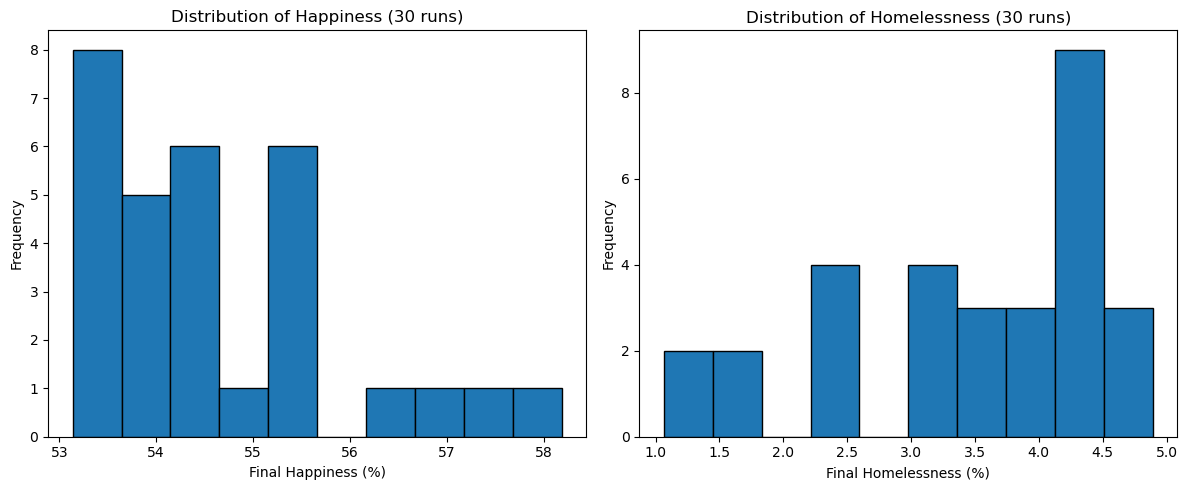

In [ ]:
def run_sim(n, max_iter=100):
    # initialize agents and houses fresh each run
    agents = generate_agents(n)
    houses = initialize_houses(agents)
    
    freq, total = get_freq_and_total(agents)
    proportions = get_proportion(freq, total)

    priced_out_mask = check_priced_out(agents, houses, proportions)
    evict_priced_out(agents, houses, priced_out_mask)

    utilities = get_utilities(agents, proportions)
    bids, neighborhoods_chosen = place_bid(agents, utilities)
    agents, houses, cutoff_bids = allocate_houses(agents, houses, bids, neighborhoods_chosen)
    houses = update_prices(houses, bids, neighborhoods_chosen, cutoff_bids)

    freq, total = get_freq_and_total(agents)
    proportions = get_proportion(freq, total)
    agents = check_happiness(agents, proportions)

    count = 1
    while not np.all(agents["happy"]):
        freq, total = get_freq_and_total(agents)
        proportions = get_proportion(freq, total)

        priced_out_mask = check_priced_out(agents, houses, proportions)
        evict_priced_out(agents, houses, priced_out_mask)

        utilities = get_utilities(agents, proportions)
        bids, neighborhoods_chosen = place_bid(agents, utilities)
        agents, houses, cutoff_bids = allocate_houses(agents, houses, bids, neighborhoods_chosen)
        houses = update_prices(houses, bids, neighborhoods_chosen, cutoff_bids)
        
        freq, total = get_freq_and_total(agents)
        proportions = get_proportion(freq, total)
        agents = check_happiness(agents, proportions)

        count += 1
        if count >= max_iter:
            break
    
    # collect final stats
    happiness = np.mean(agents["happy"]) * 100
    homelessness = np.sum(agents["neighborhood"] == -1) * 100 / n
    return happiness, homelessness

# Monte Carlo loop
n = 1_000_000
runs = 30
results = [run_sim(n) for _ in range(runs)]

happiness_vals, homelessness_vals = zip(*results)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(happiness_vals, bins=10, edgecolor="black")
plt.xlabel("Final Happiness (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Happiness (30 runs)")

plt.subplot(1,2,2)
plt.hist(homelessness_vals, bins=10, edgecolor="black")
plt.xlabel("Final Homelessness (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Homelessness (30 runs)")

plt.tight_layout()
plt.show()

# first run: 76m 18.7s = 4578.7s
# after skipping utility check for happy agents: 71m 16.6s = 4276.6s (~6.6% speedup)

In [ ]:
# plot the lognormal agents income distribution
incomes = agents["income"]

# Cut off at, say, the 99.99th percentile for visualization
cutoff = np.percentile(incomes, 99.0)
incomes_percentile = incomes[incomes <= cutoff]

fig, axes = plt.subplots(2,1,figsize = (12,12)) # one plot for actual income distr, one with top 1% cut off
axes[0].hist(incomes, bins = 500, density = True)
axes[0].set_title("Lognormal income distribution of agents")
axes[0].set_xlabel("Income per year in Rupees")
axes[0].set_ylabel("Density")
# format x-axis numbers with commas
axes[0].xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# with top 1% cut off
axes[1].hist(incomes_percentile, bins = 500, density = True)
axes[1].set_title("Lognormal income distribution of agents (top 1% exlcuded for a better view)")
axes[1].set_xlabel("Income per year in Rupees")
axes[1].set_ylabel("Density")
axes[1].xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()